In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import librosa as lr

from pathlib import PurePath
from IPython import display
from tqdm import tqdm

import vxs
import vxs.utils as vxsu

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



In [82]:
LVT_DIR = '../data/ramires-lvt/Dataset&Eval/DataSet - Wav + Annotation'
lvt_sets = {}
for rtype in [1, 2, 3]:
    frase = vxs.LVTTrackSet(LVT_DIR, subtype='Frase', recording_type=rtype, anno_type='csv')
    improvise = vxs.LVTTrackSet(LVT_DIR, subtype='Improviso', recording_type=rtype, anno_type='csv')
    lvt_sets[rtype] = frase, improvise

In [93]:
track, anno = lvt_sets[3][1].get(4)

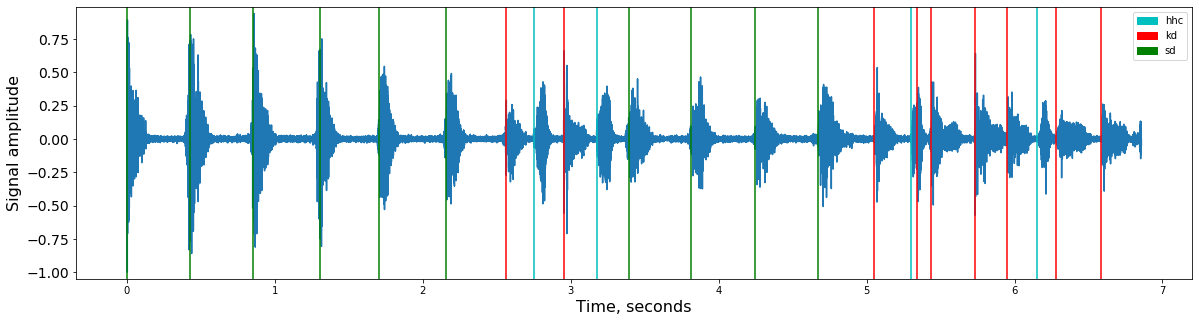

In [94]:
vxsu.plot_track(track, onsets=anno, color_events=True)

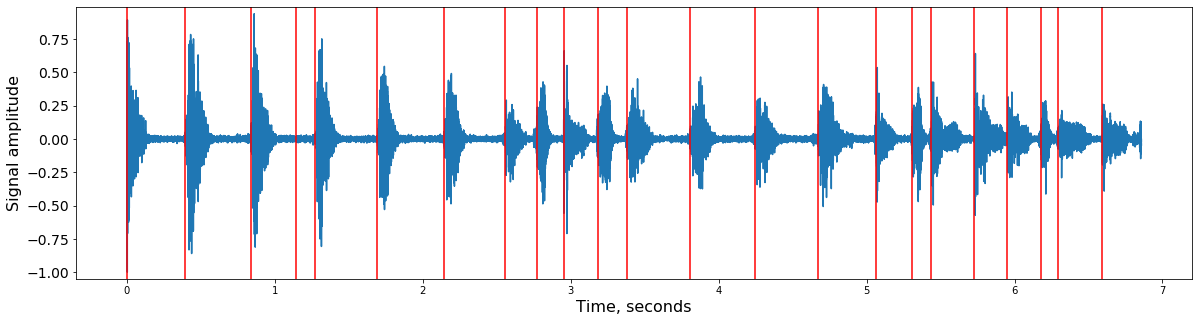

In [95]:
onsets = vxs.detect_onsets(track, method='hfc')
vxsu.plot_track(track, onsets=onsets)

In [96]:
vxsu.play_audio(track)

/home/flyingleafe/vxs-vpt/pythonenv/lib/python3.6/site-packages/IPython/lib/display.py:173: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.



In [97]:
def track_to_5_drums_ds(track, anno):
    ds = vxs.track_to_sample_set(track, anno)
    all_idxs = np.array([], dtype=int)
    clss = ['kd', 'sd', 'hhc']
    
    for cl in clss:
        cls_idx = np.arange(len(ds))[ds.classes == cl]
        if len(cls_idx) < 4:
            return None
        all_idxs = np.concatenate((all_idxs, cls_idx[:5]))
    return ds[all_idxs]

def mk_individual_datasets(trackset):
    individual_datasets = {}
    for track, anno in trackset.annotated_tracks():
        name = PurePath(track.filepath).stem[:-2]
        ds = track_to_5_drums_ds(track, anno)
        if ds is not None:
            individual_datasets[name] = ds
    return individual_datasets

def train_individual_classifiers(dss):
    individual_classifiers = {}
    for name, ds in tqdm(dss.items()):
        model = vxs.RamiresClassifier(verbose=0)
        model.fit(ds.tracks, ds.classes)
        print(name, model.sfs.k_feature_idx_)
        individual_classifiers[name] = model
    return individual_classifiers

In [99]:
%%time
all_classifiers = {}
for rtype in [1, 2, 3]:
    print('rtype ' + str(rtype))
    improv = lvt_sets[rtype][1]
    dss = mk_individual_datasets(improv)
    all_classifiers[rtype] = train_individual_classifiers(dss)

rtype 1


  8%|▊         | 1/13 [00:40<08:00, 40.01s/it]

Nor (7, 18)


 15%|█▌        | 2/13 [01:22<07:29, 40.89s/it]

Maf (0, 4, 5, 8, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 38, 45, 51)


 23%|██▎       | 3/13 [02:02<06:46, 40.61s/it]

Rob (15,)


 31%|███       | 4/13 [02:43<06:04, 40.49s/it]

AFR (25, 47)


 38%|███▊      | 5/13 [03:26<05:29, 41.23s/it]

Mar (15,)


 46%|████▌     | 6/13 [04:09<04:52, 41.80s/it]

Bic (2,)


 54%|█████▍    | 7/13 [04:49<04:08, 41.42s/it]

Zga (18,)


 62%|██████▏   | 8/13 [05:32<03:29, 41.97s/it]

Isa (15,)


 69%|██████▉   | 9/13 [06:13<02:46, 41.54s/it]

AZi (0, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 18, 24)


 77%|███████▋  | 10/13 [06:54<02:03, 41.33s/it]

MCo (15,)


 85%|████████▍ | 11/13 [07:35<01:22, 41.19s/it]

JSi (16,)


 92%|█████████▏| 12/13 [08:18<00:41, 41.90s/it]

Cra (2,)


100%|██████████| 13/13 [08:57<00:00, 41.31s/it]

Cat (15,)
rtype 2



  8%|▊         | 1/13 [00:40<08:07, 40.63s/it]

Nor (7,)


 15%|█▌        | 2/13 [01:24<07:36, 41.49s/it]

Maf (16, 18)


 23%|██▎       | 3/13 [02:04<06:53, 41.30s/it]

Rob (15,)


 31%|███       | 4/13 [02:45<06:10, 41.14s/it]

AFR (20, 21)


 38%|███▊      | 5/13 [03:29<05:35, 41.88s/it]

Mar (1,)


 46%|████▌     | 6/13 [04:13<04:56, 42.42s/it]

Bic (15,)


 54%|█████▍    | 7/13 [04:54<04:12, 42.07s/it]

Zga (40,)


 62%|██████▏   | 8/13 [05:37<03:32, 42.50s/it]

Isa (5,)


 69%|██████▉   | 9/13 [06:18<02:47, 42.00s/it]

AZi (5,)


 77%|███████▋  | 10/13 [06:59<02:04, 41.66s/it]

MCo (0, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15)


 85%|████████▍ | 11/13 [07:40<01:22, 41.42s/it]

JSi (2,)


 92%|█████████▏| 12/13 [08:23<00:42, 42.05s/it]

Cra (4, 5, 8, 14, 35)


100%|██████████| 13/13 [09:01<00:00, 41.66s/it]

Cat (5,)
rtype 3



  8%|▊         | 1/13 [00:40<08:07, 40.60s/it]

Nor (0, 4, 5, 8, 10, 11, 12, 13, 17, 18, 21)


 15%|█▌        | 2/13 [01:24<07:37, 41.57s/it]

Maf (25,)


 23%|██▎       | 3/13 [02:05<06:53, 41.37s/it]

Rob (6,)


 31%|███       | 4/13 [02:46<06:10, 41.22s/it]

AFR (15,)


 38%|███▊      | 5/13 [03:29<05:35, 41.98s/it]

Mar (15,)


 46%|████▌     | 6/13 [04:13<04:57, 42.50s/it]

Bic (4,)


 54%|█████▍    | 7/13 [04:54<04:11, 41.97s/it]

Zga (1,)


 62%|██████▏   | 8/13 [05:37<03:31, 42.33s/it]

Isa (5,)


 69%|██████▉   | 9/13 [06:18<02:47, 41.90s/it]

AZi (4, 5, 8, 16, 18)


 77%|███████▋  | 10/13 [06:59<02:04, 41.54s/it]

MCo (5,)


 85%|████████▍ | 11/13 [07:39<01:22, 41.25s/it]

JSi (15,)


 92%|█████████▏| 12/13 [08:23<00:41, 41.95s/it]

Cra (0, 4, 5, 7, 8, 10, 11, 12, 13, 14, 18, 34)


100%|██████████| 13/13 [09:01<00:00, 41.64s/it]

Cat (5,)
CPU times: user 27min 22s, sys: 29.1 s, total: 27min 51s
Wall time: 27min 2s


In [102]:
import pickle
all_features = {
    rtype: {name: model.sfs.k_feature_idx_ for name, model in all_classifiers[rtype].items()}
    for rtype in [1,2,3]
}

In [104]:
with open('../data_temp/ramires_features_idxs.pt', 'wb') as f:
    pickle.dump(all_features, f)

In [105]:
frase_tracks = {}
for rtype in [1, 2, 3]:
    frase_tracks[rtype] = {}
    for track, anno in lvt_sets[rtype][0].annotated_tracks():
        name = PurePath(track.filepath).stem[:-2]
        frase_tracks[rtype][name] = track, anno

In [116]:
cfs = {}
ms_thr = 50.0
for rtype in [1, 2, 3]:
    print(f'rtype {rtype}')
    total_cf = None

    for name, classifier in tqdm(all_classifiers[rtype].items()):
        track, anno = frase_tracks[rtype][name]
        result = vxs.segment_classify(track, classifier, onset_method='complex')#, buf_size=512, hop_size=128)
        
        onsets_f1, onsets_prec, onsets_rec = vxs.onsets_F1_score(
            result['onsets']['time'].values, anno['time'].values, ms_threshold=ms_thr, prec_rec=True)
        
        print(f'onsets: prec {onsets_prec}, rec {onsets_rec}, F1 {onsets_f1}')
        cf = vxs.classes_conf_matrix(result['onsets'], anno, ms_threshold=ms_thr)
        
        if total_cf is None:
            total_cf = cf
        else:
            total_cf = total_cf.add(cf, fill_value=0)
    
    cfs[rtype] = total_cf
    display.display(total_cf)
    display.display(vxs.cf_to_prec_rec_F1(total_cf))

  0%|          | 0/13 [00:00<?, ?it/s]

rtype 1


 15%|█▌        | 2/13 [00:00<00:02,  4.56it/s]

onsets: prec 1.0, rec 0.4, F1 0.5714285714285715
onsets: prec 1.0, rec 0.05, F1 0.09523809523809523


 23%|██▎       | 3/13 [00:00<00:02,  4.60it/s]

onsets: prec 1.0, rec 0.2, F1 0.33333333333333337


 38%|███▊      | 5/13 [00:01<00:02,  3.95it/s]

onsets: prec 1.0, rec 0.85, F1 0.9189189189189189
onsets: prec 1.0, rec 0.05, F1 0.09523809523809523


 46%|████▌     | 6/13 [00:01<00:01,  4.16it/s]

onsets: prec 0.75, rec 0.15, F1 0.24999999999999997


 54%|█████▍    | 7/13 [00:01<00:01,  3.42it/s]

onsets: prec 1.0, rec 0.65, F1 0.787878787878788


 69%|██████▉   | 9/13 [00:02<00:00,  4.10it/s]

onsets: prec 0.8571428571428571, rec 0.3, F1 0.4444444444444444
onsets: prec 1.0, rec 0.05, F1 0.09523809523809523


 77%|███████▋  | 10/13 [00:02<00:00,  4.67it/s]

onsets: prec 1.0, rec 0.05, F1 0.09523809523809523


 85%|████████▍ | 11/13 [00:02<00:00,  3.30it/s]

onsets: prec 0.8823529411764706, rec 0.75, F1 0.8108108108108107
onsets: prec 0.3333333333333333, rec 0.05, F1 0.08695652173913045


100%|██████████| 13/13 [00:03<00:00,  3.96it/s]

onsets: prec 1.0, rec 0.05, F1 0.09523809523809523


,hhc,kd,sd,sil
hhc,26,5,6,67
kd,6,13,5,80
sd,0,5,6,41
sil,2,4,0,0


,prec,rec,F1
hhc,0.764706,0.25,0.376812
kd,0.481481,0.125,0.198473
sd,0.352941,0.115385,0.173913


  0%|          | 0/13 [00:00<?, ?it/s]

rtype 2


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]

onsets: prec 0.5882352941176471, rec 1.0, F1 0.7407407407407407


 15%|█▌        | 2/13 [00:01<00:09,  1.21it/s]

onsets: prec 0.8, rec 1.0, F1 0.888888888888889


 23%|██▎       | 3/13 [00:02<00:07,  1.28it/s]

onsets: prec 0.8333333333333334, rec 1.0, F1 0.9090909090909091


 31%|███       | 4/13 [00:03<00:07,  1.17it/s]

onsets: prec 0.5128205128205128, rec 1.0, F1 0.6779661016949152


 38%|███▊      | 5/13 [00:03<00:06,  1.29it/s]

onsets: prec 0.9523809523809523, rec 1.0, F1 0.975609756097561


 46%|████▌     | 6/13 [00:04<00:05,  1.34it/s]

onsets: prec 0.8333333333333334, rec 1.0, F1 0.9090909090909091


 54%|█████▍    | 7/13 [00:05<00:04,  1.28it/s]

onsets: prec 0.5882352941176471, rec 1.0, F1 0.7407407407407407


 62%|██████▏   | 8/13 [00:06<00:03,  1.28it/s]

onsets: prec 0.6551724137931034, rec 0.95, F1 0.7755102040816326


 69%|██████▉   | 9/13 [00:06<00:03,  1.30it/s]

onsets: prec 0.7407407407407407, rec 1.0, F1 0.851063829787234


 77%|███████▋  | 10/13 [00:07<00:02,  1.42it/s]

onsets: prec 1.0, rec 1.0, F1 1.0


 85%|████████▍ | 11/13 [00:08<00:01,  1.32it/s]

onsets: prec 0.6060606060606061, rec 1.0, F1 0.7547169811320755


 92%|█████████▏| 12/13 [00:08<00:00,  1.42it/s]

onsets: prec 0.9, rec 0.9, F1 0.9


100%|██████████| 13/13 [00:09<00:00,  1.35it/s]

onsets: prec 0.8695652173913043, rec 1.0, F1 0.9302325581395349


,hhc,kd,sd,sil
hhc,88,1,14,1
kd,1,93,10,0
sd,1,15,34,2
sil,33,29,34,0


,prec,rec,F1
hhc,0.715447,0.846154,0.77533
kd,0.673913,0.894231,0.768595
sd,0.369565,0.653846,0.472222


  0%|          | 0/13 [00:00<?, ?it/s]

rtype 3


  8%|▊         | 1/13 [00:00<00:08,  1.42it/s]

onsets: prec 0.7037037037037037, rec 0.95, F1 0.8085106382978724


 15%|█▌        | 2/13 [00:01<00:07,  1.46it/s]

onsets: prec 0.8260869565217391, rec 0.95, F1 0.8837209302325583


 23%|██▎       | 3/13 [00:01<00:06,  1.52it/s]

onsets: prec 0.8571428571428571, rec 0.9, F1 0.8780487804878048


 31%|███       | 4/13 [00:02<00:05,  1.54it/s]

onsets: prec 0.9090909090909091, rec 1.0, F1 0.9523809523809523


 38%|███▊      | 5/13 [00:02<00:04,  1.75it/s]

onsets: prec 1.0, rec 0.6, F1 0.7499999999999999


 46%|████▌     | 6/13 [00:03<00:04,  1.68it/s]

onsets: prec 0.8333333333333334, rec 1.0, F1 0.9090909090909091


 54%|█████▍    | 7/13 [00:04<00:03,  1.66it/s]

onsets: prec 0.9090909090909091, rec 1.0, F1 0.9523809523809523


 62%|██████▏   | 8/13 [00:04<00:03,  1.66it/s]

onsets: prec 0.8095238095238095, rec 0.85, F1 0.8292682926829269


 69%|██████▉   | 9/13 [00:05<00:02,  1.65it/s]

onsets: prec 0.5909090909090909, rec 0.65, F1 0.6190476190476191


 77%|███████▋  | 10/13 [00:06<00:01,  1.66it/s]

onsets: prec 0.9523809523809523, rec 1.0, F1 0.975609756097561


 85%|████████▍ | 11/13 [00:06<00:01,  1.65it/s]

onsets: prec 0.9090909090909091, rec 1.0, F1 0.9523809523809523


 92%|█████████▏| 12/13 [00:07<00:00,  1.68it/s]

onsets: prec 0.95, rec 0.95, F1 0.9500000000000001


100%|██████████| 13/13 [00:07<00:00,  1.66it/s]

onsets: prec 0.9090909090909091, rec 1.0, F1 0.9523809523809523


,hhc,kd,sd,sil
hhc,76,6,19,3
kd,4,78,8,14
sd,12,3,31,6
sil,16,17,9,0


,prec,rec,F1
hhc,0.703704,0.730769,0.716981
kd,0.75,0.75,0.75
sd,0.462687,0.596154,0.521008
